# Projet ML
GAUD - CURRAL - GALMIER

## Libraries

### Installation

In [2]:
# ! pip install tensorflow

### Import

In [3]:
import numpy as np
import tensorflow as tf
from glob import glob
from tensorflow import audio

import numpy as np
# import required modules
import os

### Variables

In [4]:
# Définir le chemin vers le dataset et lister les genres

test_path       = 'Data\\test'
train_path      = 'Data\\train'
val_path        = 'Data\\val'

# Code

In [5]:
! pip install resampy

In [6]:
import librosa
import librosa.display
import librosa.feature

import numpy as np
import pandas as pd
import resampy

In [7]:
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)
        mfccs_processed = np.mean(mfccs.T,axis=0)

    except Exception as e:
        print("Erreur rencontrée lors de l'extraction des caractéristiques: ", file_name)
        return None

    return mfccs_processed

In [8]:
genres = os.listdir(train_path)
print(genres)

['Asian Koel', 'Black Kite', 'Black-breasted Parrotbill', 'Black-necked crane', 'Bristled Grassbird', 'Cheer Pheasant', 'Common Cuckoo', 'Common Pochard', 'Common Wood Pigeon', 'Eastern Imperial Eagle', 'Egyptian Vulture', 'Great Slaty Woodpecker', 'Greater Spotted Eagle', 'Grey Treepie', 'Grey-crowned Prinia', 'Grey-sided Thrush', 'Himalayan Monal', 'House Crow', 'House Sparrow', 'Indian Spotted Eagle', 'Jerdon_s Babbler', 'Kashmir Flycatcher', 'Large-billed Crow', 'Long-tailed Duck', 'Pallas_s Fish Eagle', 'Red-billed Blue Magpie', 'Rose-ringed Parakeet', 'Rufous Treepie', 'Rufous-necked Hornbill', 'Rustic Bunting', 'Saker Falcon', 'Sarus Crane', 'Satyr Tragopan', 'Slender-billed Babbler', 'Spiny Babbler', 'Spotted Dove', 'Steppe Eagle', 'Swamp Francolin', 'Swamp Grass-babbler', 'White-throated Bushchat', 'Wood Snipe']


In [9]:
featuresTrain = []
for genre in genres:
    files = os.listdir(train_path + '/' + genre)
    for file in files:
        file_name = os.path.join(train_path, genre, file)
        data = extract_features(file_name)
        if (data is None): # Gestion du cas spécial pour jazz.0054.wav
          continue
        featuresTrain.append([data, genre])

# Convertir en un format approprié pour l'entraînement
featuresTrainDf = pd.DataFrame(featuresTrain, columns=['feature','class_label'])

In [10]:
featuresTest = []
for genre in genres:
    files = os.listdir(test_path + '/' + genre)
    for file in files:
        file_name = os.path.join(test_path, genre, file)
        data = extract_features(file_name)
        if (data is None): # Gestion du cas spécial pour jazz.0054.wav
          continue
        featuresTest.append([data, genre])

# Convertir en un format approprié pour l'entraînement
featuresTestDf = pd.DataFrame(featuresTest, columns=['feature','class_label'])

In [11]:
featuresVal = []
for genre in genres:
    files = os.listdir(val_path + '/' + genre)
    for file in files:
        file_name = os.path.join(val_path, genre, file)
        data = extract_features(file_name)
        if (data is None): # Gestion du cas spécial pour jazz.0054.wav
          continue
        featuresVal.append([data, genre])

# Convertir en un format approprié pour l'entraînement
featuresValDf = pd.DataFrame(featuresVal, columns=['feature','class_label'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [13]:
le = LabelEncoder()


x_train = np.array(featuresTrainDf.feature.tolist())
y_train = to_categorical(le.fit_transform(np.array(featuresTrainDf.class_label.tolist())),num_classes=41)

x_test = np.array(featuresTestDf.feature.tolist())
y_test = to_categorical(le.fit_transform(np.array(featuresTestDf.class_label.tolist())),num_classes=41)

x_val = np.array(featuresValDf.feature.tolist())
y_val = to_categorical(le.fit_transform(np.array(featuresValDf.class_label.tolist())),num_classes=41)

"""

# Diviser le dataset en données temporaire (entraînement + validation) et données de test
x_temp, x_test, y_temp, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)

# Diviser les données temporaire en données d'entraînement et de validation
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1, random_state=42)
"""

"\n\n# Diviser le dataset en données temporaire (entraînement + validation) et données de test\nx_temp, x_test, y_temp, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)\n\n# Diviser les données temporaire en données d'entraînement et de validation\nx_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1, random_state=42)\n"

In [14]:
model = Sequential()
model.add(Dense(512, input_shape=(20,), activation='relu'))  # 40 correspond au nombre de caractéristiques (MFCCs)
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41, activation='softmax'))  # 41 pour le nombre de race oiso

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               10752     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 41)                21033     
                                                                 
Total params: 294441 (1.12 MB)
Trainable params: 294441 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=410, validation_data=(x_val, y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/410


163/163 [==============================] - 2s 6ms/step - loss: 10.6098 - accuracy: 0.0669 - val_loss: 3.6098 - val_accuracy: 0.0955
Epoch 2/410
163/163 [==============================] - 1s 4ms/step - loss: 3.5672 - accuracy: 0.0924 - val_loss: 3.4684 - val_accuracy: 0.1080
Epoch 3/410
163/163 [==============================] - 1s 5ms/step - loss: 3.3192 - accuracy: 0.1294 - val_loss: 3.0662 - val_accuracy: 0.1878
Epoch 4/410
163/163 [==============================] - 1s 5ms/step - loss: 3.1349 - accuracy: 0.1557 - val_loss: 2.8211 - val_accuracy: 0.2034
Epoch 5/410
163/163 [==============================] - 1s 5ms/step - loss: 2.9992 - accuracy: 0.1628 - val_loss: 2.6424 - val_accuracy: 0.2254
Epoch 6/410
163/163 [==============================] - 1s 5ms/step - loss: 2.8509 - accuracy: 0.2002 - val_loss: 2.4464 - val_accuracy: 0.2926
Epoch 7/410
163/163 [==============================] - 1s 5ms/step - loss: 2.6841 - accuracy: 0.2460 - val_loss: 2.3749 - val_accuracy: 0.3

22/22 [==============================] - 0s 2ms/step
Matrice de Confusion:
[[31  2  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  4]]


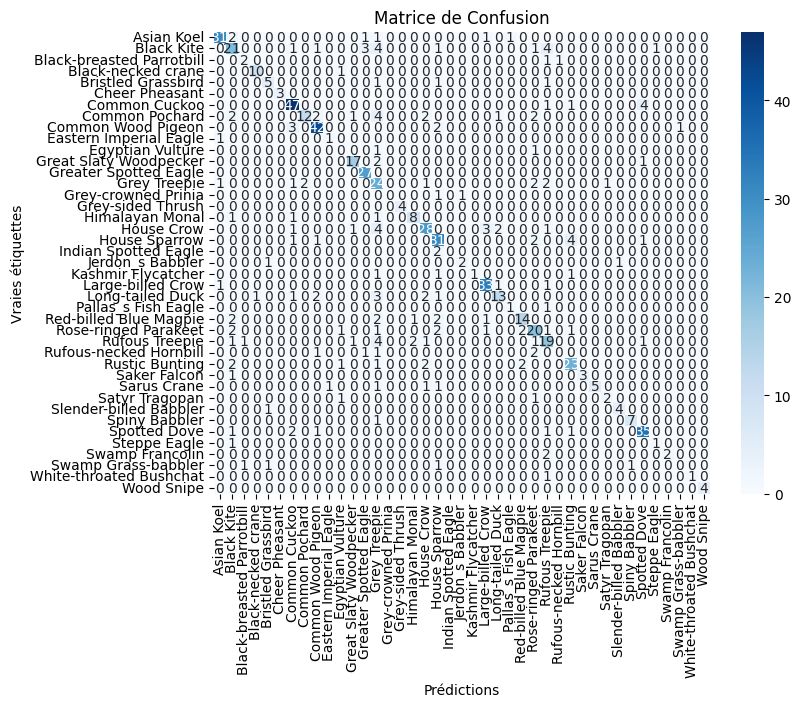


Rapport de Classification:
                           precision    recall  f1-score   support

               Asian Koel       0.91      0.84      0.87        37
               Black Kite       0.58      0.57      0.58        37
Black-breasted Parrotbill       0.50      0.50      0.50         4
       Black-necked crane       0.91      0.91      0.91        11
       Bristled Grassbird       0.62      0.62      0.62         8
           Cheer Pheasant       1.00      1.00      1.00         3
            Common Cuckoo       0.81      0.89      0.85        53
           Common Pochard       0.86      0.46      0.60        26
       Common Wood Pigeon       0.84      0.88      0.86        48
   Eastern Imperial Eagle       0.50      0.50      0.50         2
         Egyptian Vulture       0.00      0.00      0.00         2
   Great Slaty Woodpecker       0.85      0.85      0.85        20
    Greater Spotted Eagle       0.84      1.00      0.92        27
             Grey Treepie       0

C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\romai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1471

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Faites des prédictions sur votre ensemble de test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Créez la matrice de confusion
confusion = confusion_matrix(y_true, y_pred_classes)

print("Matrice de Confusion:")
print(confusion)

# Vous pouvez également utiliser seaborn pour visualiser la matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=featuresTrainDf['class_label'].unique(), yticklabels=featuresTrainDf['class_label'].unique())
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

# Affichez le rapport de classification pour des métriques détaillées
print("\nRapport de Classification:")
print(classification_report(y_true, y_pred_classes, target_names=featuresTrainDf['class_label'].unique()))